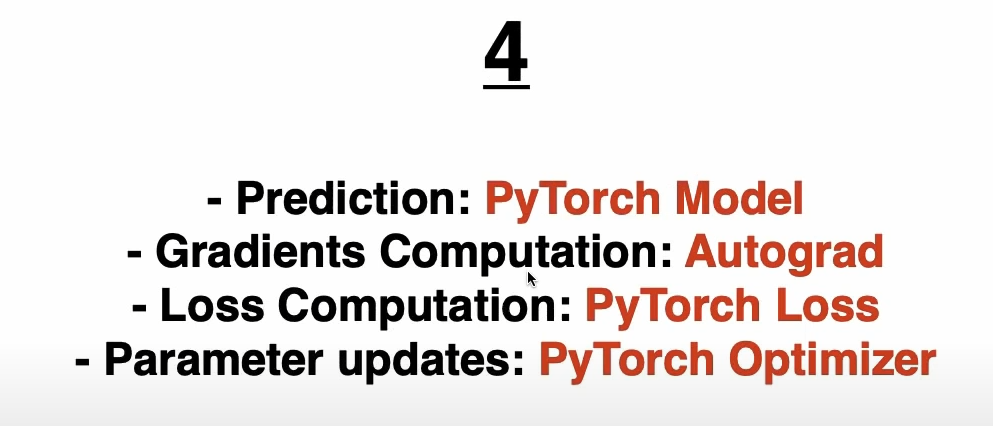

In [8]:
# Pipeline:

# 1) Design Model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training Loop
#     - forward pass  : compute prediction
#     - backward pass : gradients
#     - update weights

In [9]:
import torch
import torch.nn as nn

In [10]:
# f = w*x
# f = 2*x

# 2D data
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

4 1


In [11]:
# Model

# model = nn.Linear(input_size, output_size)

# equivalent to 1 linear layer
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

In [12]:
# test sample
X_test = torch.tensor([5], dtype=torch.float32)
print('Prediction before training : f(0) = {:.3f}'.format(model(X_test).item()))

Prediction before training : f(0) = -3.479


In [13]:
# Training
learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
        
    # zero gradients
    optimizer.zero_grad()
    
    if epoch%20 == 0:
        [w,b] = model.parameters()
        print('Epoch {}: w = {:.3f}, loss = {:.8f}'.format(epoch+1, w[0][0].item(), l))
        
print('Prediction after training : f(50) = {:.3f}'.format(model(X_test).item()))

Epoch 1: w = -0.176, loss = 57.42740631
Epoch 21: w = 1.845, loss = 0.05343365
Epoch 41: w = 1.903, loss = 0.01333415
Prediction after training : f(50) = 9.807
